In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns
import datetime
plt.rcParams["figure.figsize"] = [15, 7]

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
citations = '''
  select * from [dbo].[spd_PDCitations$]  
  '''
citations = pd.read_sql(citations, connection)
connection.close()

#filter for only citations indicative of vehicle accidents

citations['Month'] = citations['Citation Date'].dt.month
citations['Day'] = citations['Citation Date'].dt.day


# Case_Data['MeetingDate'] = Case_Data['MeetingDate'].dt.year #converte MeetingDate to year


vehicular_accidents = citations.loc[citations['Charge Description'].str.contains(
    'Failure to Control Speed to Avoid A Collision')]

# vehicular_accidents
citations

,tcmainid,Citation #,Citation Date,Citation Time,Arizona Statute Code,Charge Description,Citation Type Code,Citation Type Description,Officer Badge #,Street Number,...,District,Beat,Zone,Cited Person,Cited Person Age,Cited Person Race,Cited Person Sex,Cited Person Ethnicity,Month,Day
0,621784.0,2065379.0,2018-06-23,204.0,13-1203A1,Assault-Intentional/Recklessly Injure,CR,Criminal,1489.0,1xxx,...,D1,2.0,412.0,"Hill, Julie",25.0,I,F,N,6,23
1,621797.0,2063172.0,2018-06-23,928.0,13-3415A,Drug Paraphernalia-Possess/Use,CR,Criminal,1214.0,7xxx,...,D3,10.0,2504.0,"Mc Cuan, Michael",51.0,W,M,N,6,23
2,621806.0,2056700.0,2018-06-23,1053.0,28-701A,Failure to Control Speed to Avoid A Collision,CV,Civil Traffic,1360.0,xxx,...,D3,10.0,2501.0,"Glasscock, James",60.0,W,M,N,6,23
3,621847.0,2050143.0,2018-06-23,2345.0,19-19A,Urinate/Defecate In Public,MC,Municipal Code,1345.0,4xxx,...,D2,6.0,904.0,"Still, Marcus",22.0,B,M,N,6,23
4,621878.0,2063174.0,2018-06-24,927.0,28-3473A,Suspended/Revoked D.L.,CT,Criminal Traffic,1214.0,8xxx,...,D2,8.0,2205.0,"Chacon, Kimberly",48.0,W,F,N,6,24
5,621881.0,2065600.0,2018-06-24,1244.0,28-729.1,Unsafe Lane Change,CV,Civil Traffic,1484.0,7xxx,...,D3,11.0,2904.0,"Garrett, Ryan",30.0,B,M,U,6,24
6,621888.0,2065454.0,2018-06-23,1155.0,28-3473A,Suspended/Revoked D.L.,CT,Criminal Traffic,1460.0,xxx,...,D4,19.0,3801.0,"Hochgraber, Brent",41.0,W,M,N,6,23
7,621960.0,2060086.0,2018-06-20,1855.0,28-959.01B,Improper Material/Tint On Window,CV,Civil Traffic,1180.0,xxx,...,D4,19.0,3801.0,"Riggle, Debera",55.0,W,F,U,6,20
8,621977.0,2058260.0,2018-06-20,1148.0,28-2532A,Expired/No Arizona Registration,CV,Civil Traffic,1182.0,1xxx,...,D3,13.0,3010.0,"Macrae, Andrew",22.0,W,M,U,6,20
9,621983.0,2056417.0,2018-06-20,2053.0,28-701A,Speed Greater Than R&P or Posted,CV,Civil Traffic,1202.0,5xxx,...,D2,8.0,2201.0,"San, Felix",57.0,B,M,U,6,20


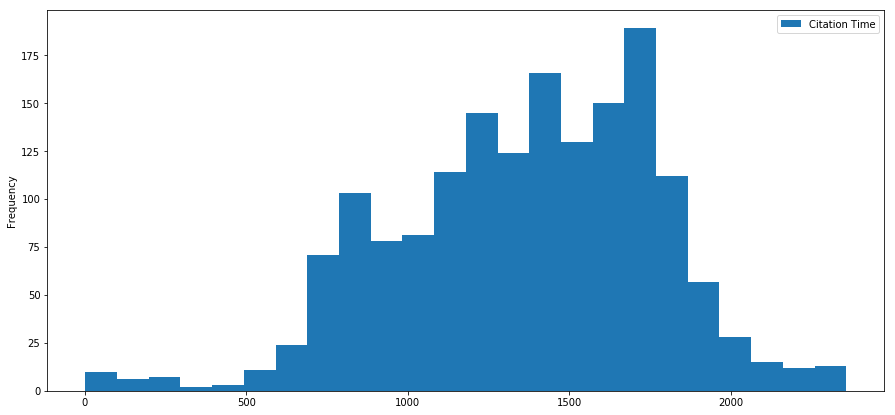

In [10]:
vehicular_accidents.plot(y='Citation Time', kind='hist', bins=24)

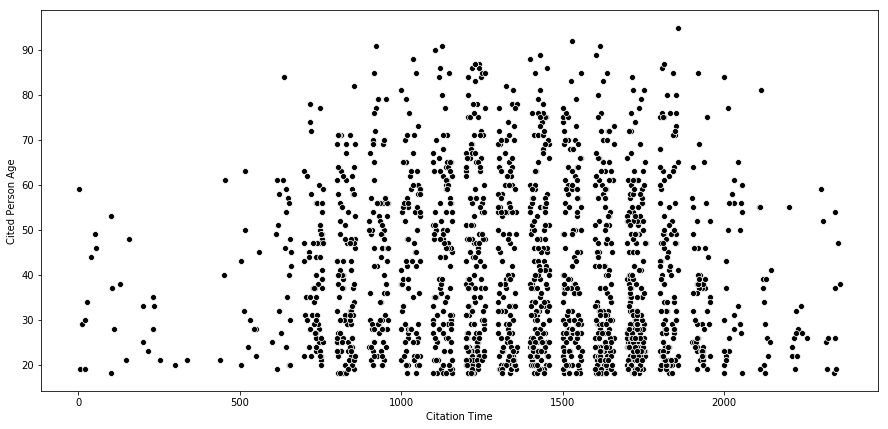

In [53]:
sns.scatterplot(x=vehicular_accidents['Citation Time'], 
                y=vehicular_accidents['Cited Person Age'], color='black')

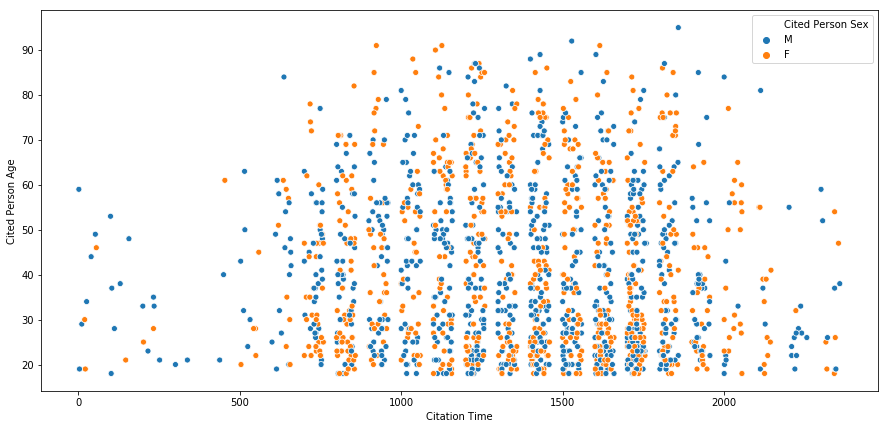

In [48]:
sns.scatterplot(x=vehicular_accidents['Citation Time'], 
                y=vehicular_accidents['Cited Person Age'], 
                hue=vehicular_accidents['Cited Person Sex'])

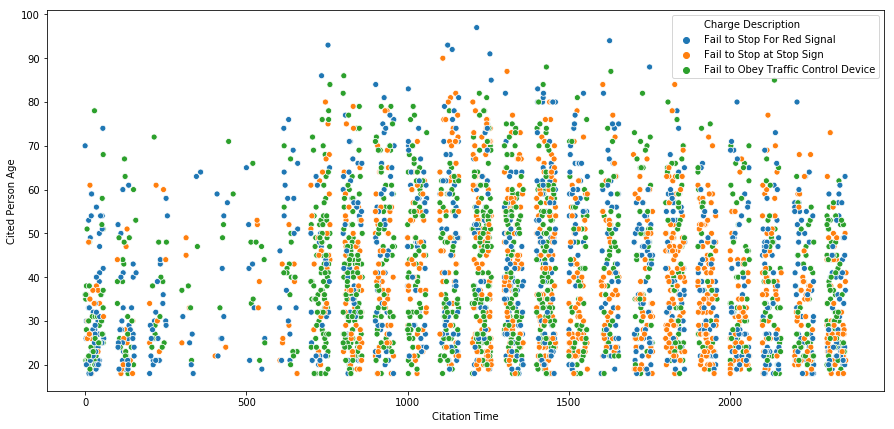

In [47]:
sns.scatterplot(x=fail_to_obey['Citation Time'], 
                y=fail_to_obey['Cited Person Age'], 
                hue=fail_to_obey['Charge Description'])

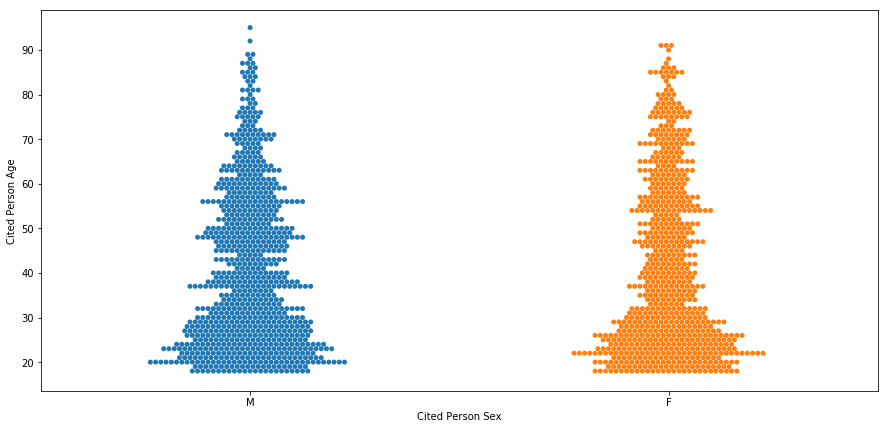

In [59]:
sns.swarmplot(x=vehicular_accidents['Cited Person Sex'], 
                y=vehicular_accidents['Cited Person Age'])

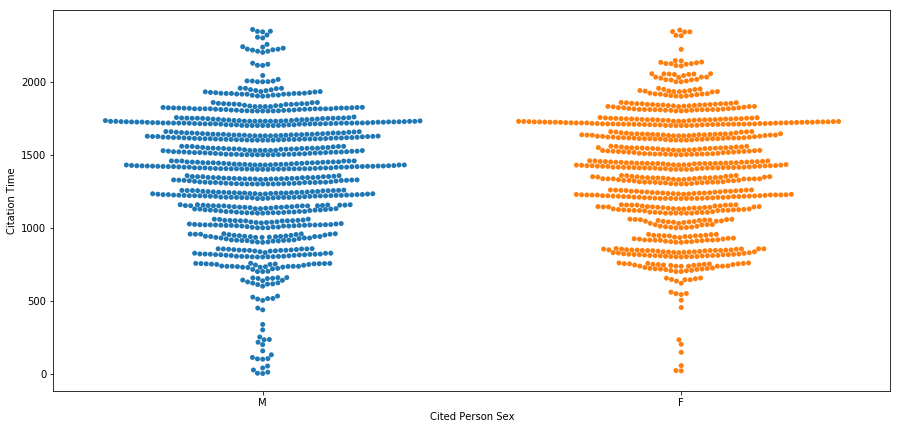

In [5]:
sns.swarmplot(x=vehicular_accidents['Cited Person Sex'], 
                y=vehicular_accidents['Citation Time'])

In [66]:
searchfor = [
    'Fail to Obey Traffic Control Device',
    'Fail to Stop at Stop Sign',
    'Fail to Stop For Red Signal']

fail_to_obey = citations[citations['Charge Description'].str.contains('|'.join(searchfor))]
# fail_to_obey

# x = fail_to_obey.groupby(['Charge Description'])['Charge Description'].count()
# x

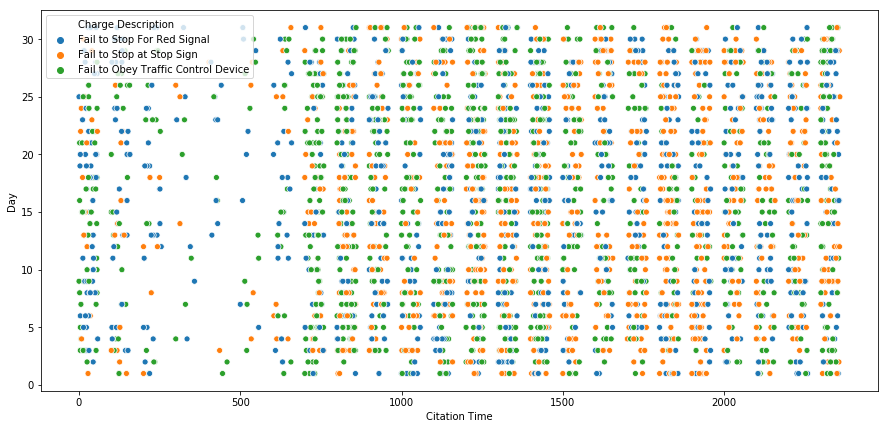

In [69]:
sns.scatterplot(x=fail_to_obey['Citation Time'], 
                y=fail_to_obey['Day'], 
                hue=fail_to_obey['Charge Description'])

# plt.ylim(0, 30000) #examine just business numbers under 2000
# plt.xlim(2015, 2020)

# some officers seem to be patrolling for specific infractions